## Support Vector Machines

#### AI Saturday Lagos Begineers Class (Instructors: `Tejumade Afonja`, `Kenechi Dukor`, `Ifeanyi Igwegbe George`)
This exercise is adopted from [Andrew Ng Machine Learning Course](https://www.coursera.org/learn/machine-learning) and [Scikit Learn](https://scikit-learn.org/stable/modules/svm.html)

In [22]:
from sklearn import svm
import numpy as np
import os
import scipy as sp
import scipy.io
from scipy.optimize import minimize
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

For this exercise, we will be utilizing the SVM functionality in scikit learn to trains our model. As advised by Andrew, we should'nt bother ourselves this coding an SVM algorithim from scratch yet. 

It is good practice to go through the documentation of a library before we use it's functions. Below are some details gotten from the scikit learn library.

#### Parameters considered in building an SVM:

**C :** ***float, optional (default=1.0)***

Penalty parameter C of the error term.

**kernel :** ***string, optional (default=’rbf’)***

linear - $$\langle x, x'\rangle$$

polynomial - $$(\gamma \langle x, x'\rangle + r)^d . d$$ is specified by keyword degree,  by coef0.

rbf - $$\exp(-\gamma \|x-x'\|^2) . \gamma $$ is specified by keyword gamma, must be greater than 0.

Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ (Radial Basis Function) will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape `(n_samples, n_samples)`.

**degree :** ***int, optional (default=3)***

Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

**gamma :** ***float, optional (default=’auto’)***

Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

Current default is ‘auto’ which uses 1 / n_features, if `gamma='scale'` is passed then it uses 1 / (n_features * X.var()) as value of gamma.

**coef0 :** ******float, optional (default=0.0)***

Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

**probability :** ***boolean, optional (default=False)***

Whether to enable probability estimates. This must be enabled prior to calling fit, and will slow down that method.

**tol :** ***float, optional (default=1e-3)***

Tolerance for stopping criterion.

**class_weight :** ***{dict, ‘balanced’}, optional***

Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as `n_samples / (n_classes * np.bincount(y))`

**max_iter :** ***int, optional (default=-1)***

Hard limit on iterations within solver, or -1 for no limit.

**decision_function_shape :** ***‘ovo’, ‘ovr’, default=’ovr’***

Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used as multi-class strategy.

**random_state :** ***int, RandomState instance or None, optional (default=None)***

The seed of the pseudo random number generator used when shuffling the data for probability estimates. If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by `np.random`.

### SVM For Classification

`SVC`, `NuSVC` and `LinearSVC` are classes capable of performing multi-class classification on a dataset.

As other classifiers, SVC, NuSVC and LinearSVC take as input two arrays: an array X of size [n_samples, n_features] holding the training samples, and an array y of class labels (strings or integers), size [n_samples]

##### Example 1

In [76]:
X = [[0, 0], [1, 1]]
y = [0, 1]

In [77]:
clf = svm.SVC(gamma='scale')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [80]:
clf.predict([[5., 5.]])

array([1])

#### Multi-class Classification

##### Example 2

In [81]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]

In [82]:
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [94]:
clf.predict([[2.4]])

array([2])

In [98]:
dec = clf.decision_function([[1]])
dec.shape[1]

6

On the other hand, LinearSVC implements “one-vs-the-rest” multi-class strategy, thus training n_class models. If there are only two classes, only one model is trained:

In [96]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [97]:
lin_clf.predict([[2]])

array([3])

In [32]:
dec = lin_clf.decision_function([[1]])
dec.shape[1]

4

### Regression

##### Example 3

In [99]:
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]

In [100]:
clf = svm.SVR()
clf.fit(X, y) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [103]:
clf.predict([[1, 1]])

array([1.5])

### Kernel Function

In [104]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.kernel

'linear'

In [105]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.kernel

'rbf'

#### Custom Kernels

You can define your own kernels by either giving the kernel as a python function

In [37]:
def my_kernel(X, Y):
    return np.dot(X, Y.Tex1data1)

In [38]:
clf = svm.SVC(kernel=my_kernel)

In [39]:
clf.kernel

<function __main__.my_kernel(X, Y)>

### Class Example

In [40]:
dataset_1 = scipy.io.loadmat('data/ex6data1.mat')
dataset_2 = scipy.io.loadmat('data/ex6data2.mat')
dataset_3 = scipy.io.loadmat('data/ex6data3.mat')

In [41]:
X_1 = dataset_1['X']
y_1 = dataset_1['y'].reshape(-1)

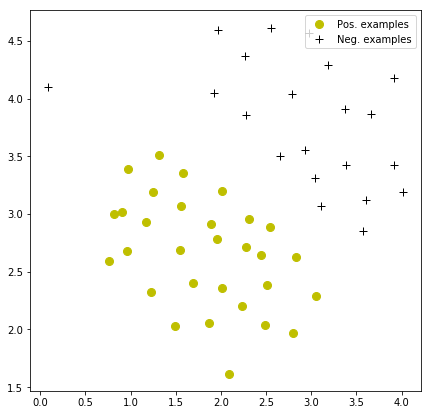

In [42]:
plt.figure(figsize=(7, 7))
plt.plot(X_1[y_1 == 0,0], X_1[y_1 == 0,1], 'yo', ms=8, label='Pos. examples')
plt.plot(X_1[y_1 == 1,0], X_1[y_1 == 1,1], 'k+', ms=8, label='Neg. examples')
plt.legend(numpoints = 1, loc = 1)
plt.show()

In [43]:
clf = svm.SVC(C=1, kernel='linear')
clf.fit(X_1, y_1)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [114]:
def plot(X_1, y_1):
    xs = sp.linspace(-1, 8)
        # Calculate the decision boundary
    b = clf.intercept_[0]
    w_0 = clf.coef_[0, 0]
    w_1 = clf.coef_[0, 1]
    a = - w_0 / w_1
    db_1 = a * xs - b / w_1

    # Store support vectors
    svs = clf.support_vectors_

    # Calculate margins
    c = svs[0]
    margin_low = a * (xs - c[0]) + c[1] # line of slope "a" passing through point "(c[0], c[1])"
    c = svs[-2]
    margin_high = a * (xs - c[0]) + c[1]
    
    
    ### PLot
    
    plt.figure(figsize=(7,7))
    plt.plot(X_1[y_1 == 0,0], X_1[y_1 == 0,1], 'yo', ms=8, label='Pos. examples')
    plt.plot(X_1[y_1 == 1,0], X_1[y_1 == 1,1], 'k+', ms=8, label='Neg. examples')
    plt.plot(xs, db_1, 'b-', lw=1, label='Decision boundary')
    plt.plot(xs, margin_low, 'b--', lw=0.5, label='Margin')
    plt.plot(xs, margin_high, 'b--', lw=0.5)
    plt.plot(svs.T[0], svs.T[1], marker='o', ls='none', ms=15, mfc='none', mec='b', mew=0.5, label='Support vectors')
    plt.xlim(-0.25, 4.4)
    plt.ylim(1.25, 6.9)
    plt.legend(numpoints = 1, loc = 1)
    plt.show()

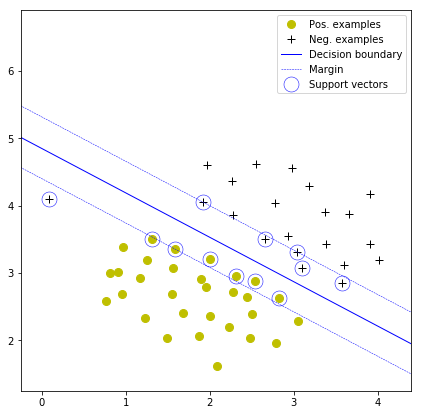

In [45]:
plot(X_1, y_1)

In [46]:
clf = svm.SVC(C=100, kernel='linear')
clf.fit(X_1, y_1)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

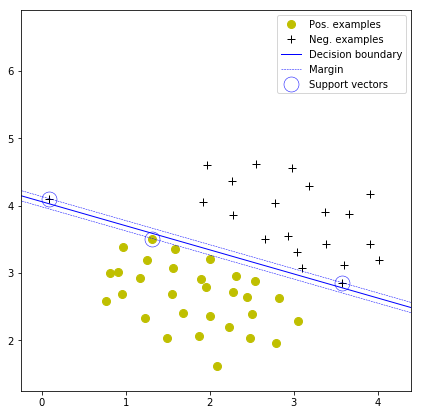

In [47]:
plot(X_1, y_1)

### Gaussian

In [115]:
X_2 = dataset_2['X']
y_2 = dataset_2['y'].reshape(-1)

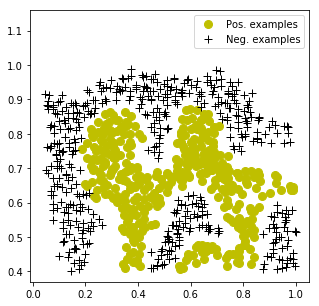

In [116]:
plt.figure(figsize=(5, 5))
plt.plot(X_2[y_2 == 0].T[0], X_2[y_2 == 0].T[1], 'yo', ms=8, label='Pos. examples')
plt.plot(X_2[y_2 == 1].T[0], X_2[y_2 == 1].T[1], 'k+', ms=8, label='Neg. examples')
plt.xlim(-0.01, 1.05)
plt.ylim(0.37, 1.16)
plt.legend()
plt.show()

In [50]:
sigma = 0.1
gamma = 1 / 2 / sigma**2
clf = svm.SVC(C=1, gamma=gamma, kernel='rbf')
clf.fit(X_2, y_2)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [117]:
x_0_pts, x_1_pts = sp.linspace(0, 1, 500), sp.linspace(0, 1, 500)
x_0_pts_mesh, x_1_pts_mesh = sp.meshgrid(x_0_pts, x_1_pts)
z = clf.predict(sp.vstack((x_0_pts_mesh.ravel(), x_1_pts_mesh.ravel())).T).reshape(x_0_pts_mesh.shape)

C:\Users\Kenechi.Dukor\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


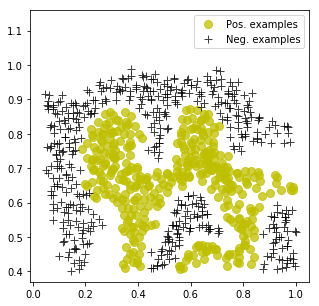

In [118]:
plt.figure(figsize=(5, 5))
plt.plot(X_2[y_2 == 0].T[0], X_2[y_2 == 0].T[1], 'yo', ms=8, alpha=0.75, label='Pos. examples')
plt.plot(X_2[y_2 == 1].T[0], X_2[y_2 == 1].T[1], 'k+', ms=8, alpha=0.75, label='Neg. examples')
plt.contour(x_0_pts, x_1_pts, z, [0])
plt.xlim(-0.01, 1.05)
plt.ylim(0.37, 1.16)
plt.legend()
plt.show()

WEEK 6 exercise

In [53]:
data = np.loadtxt("data/ex1data1.txt", delimiter=',')

In [54]:
X = np.c_[data[:,0]] 
Y = data[:,1]

In [55]:
clf = svm.SVR(gamma="scale")
clf.fit(X, Y) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [56]:
clf.predict([[5.5]]) * 10000

array([2535.22786954])

WEEEK 7 exercise

In [106]:
data = np.loadtxt("data/ex1data2.txt", delimiter=',')

In [110]:
X = np.c_[data[:,0], data[:,1]]
Y = np.c_[data[:,2]]

In [112]:
clf = svm.SVR(gamma='scale')
clf.fit(X, Y) 

C:\Users\Kenechi.Dukor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [113]:
clf.predict([[8966, 4]])

array([299900.93775792])